In [ ]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasRegressor
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
#
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch


In [ ]:
# Might need to run if not connected to the google drive

from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import os

# Specify the path to the folder
folder_path = '/gdrive/MyDrive/Colab Notebooks/Reseach Spring 2024/rough-sfd-ml/roughsims/'

# List all items in the folder
items = os.listdir(folder_path)

# Filter out the items that are directories
directories = [item for item in items if os.path.isdir(os.path.join(folder_path, item))]

# Get the number of directories
num_directories = len(directories)

print(f"There are {num_directories} directories in the folder.")


There are 1281 directories in the folder.


In [ ]:
import os
import pandas as pd

# Base path where the directories are located
base_path = '/gdrive/MyDrive/Colab Notebooks/Reseach Spring 2024/rough-sfd-ml/roughsims/'

# Define file names and their corresponding keys
file_names = {
    't.txt': 't_data',
    'Z.txt': 'Z_data',
    'Fsd.txt': 'Fsd_data',
}

# Initialize empty lists to store data for each FileType
data_lists = {
    't_data': [],
    'Z_data': [],
    'Fsd_data': [],
}

# List all directories within the base path and process the specified directories
directories = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]
directories_to_process = directories[:]  # Adjust as needed

# Loop through each of the specified directories
for directory in directories_to_process:
    dir_path = os.path.join(base_path, directory, "Results/")
    for file_name, data_key in file_names.items():
        file_path = os.path.join(dir_path, file_name)
        if os.path.exists(file_path):
            # Read the file content, accounting for both commas and newlines
            with open(file_path, 'r') as file:
                file_content = file.read()
                # Split on both commas and newlines
                file_content_list = [value for line in file_content.splitlines() for value in line.split(',') if value.strip()]
                # Convert strings to the appropriate numeric type (int or float), handling scientific notation
                file_content_numeric = [float(value) for value in file_content_list]
            # Prepare data for DataFrame creation (each value as a separate column)
            data_entry = {'Directory': directory}
            data_entry.update({f'Data_{i}': val for i, val in enumerate(file_content_numeric)})
            data_lists[data_key].append(data_entry)

# Convert the lists to DataFrames
t_data_df = pd.DataFrame(data_lists['t_data'])
Z_data_df = pd.DataFrame(data_lists['Z_data'])
Fsd_data_df = pd.DataFrame(data_lists['Fsd_data'])



In [ ]:
t_data_df.head()

,Directory,Data_0,Data_1,Data_2,Data_3,Data_4,Data_5,Data_6,Data_7,Data_8,...,Data_591,Data_592,Data_593,Data_594,Data_595,Data_596,Data_597,Data_598,Data_599,Data_600
0,"13-Jun-2019_Run2, Seed_67",0.0,0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,...,2.955,2.96,2.965,2.97,2.975,2.98,2.985,2.99,2.995,3.0
1,"13-Jun-2019_Run2, Seed_68",0.0,0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,...,2.955,2.96,2.965,2.97,2.975,2.98,2.985,2.99,2.995,3.0
2,"13-Jun-2019_Run2, Seed_70",0.0,0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,...,2.955,2.96,2.965,2.97,2.975,2.98,2.985,2.99,2.995,3.0
3,"13-Jun-2019_Run2, Seed_69",0.0,0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,...,2.955,2.96,2.965,2.97,2.975,2.98,2.985,2.99,2.995,3.0
4,"13-Jun-2019_Run2, Seed_72",0.0,0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,...,2.955,2.96,2.965,2.97,2.975,2.98,2.985,2.99,2.995,3.0


In [ ]:
Z_data_df.head()

,Directory,Data_0,Data_1,Data_2,Data_3,Data_4,Data_5,Data_6,Data_7,Data_8,...,Data_2591,Data_2592,Data_2593,Data_2594,Data_2595,Data_2596,Data_2597,Data_2598,Data_2599,Data_2600
0,"13-Jun-2019_Run2, Seed_67",0.003034,0.003034,0.011232,0.013181,0.000382,-0.004534,-0.022491,-0.021973,-0.024067,...,0.021549,0.028325,0.023088,0.000462,-0.001160,0.003089,0.005279,0.000131,0.000964,-0.016452
1,"13-Jun-2019_Run2, Seed_68",-0.023813,-0.023813,-0.006451,-0.004867,0.003332,-0.020711,-0.038731,-0.063260,-0.053068,...,0.001618,-0.025584,-0.049005,-0.066381,-0.077838,-0.080150,-0.085682,-0.071755,-0.061877,-0.067911
2,"13-Jun-2019_Run2, Seed_70",-0.041874,-0.041874,-0.055718,-0.060810,-0.068697,-0.072567,-0.046434,-0.047516,-0.041685,...,-0.028689,-0.043786,-0.053697,-0.049317,-0.038520,-0.020377,-0.026184,-0.040328,-0.021107,-0.029402
3,"13-Jun-2019_Run2, Seed_69",-0.005299,-0.005299,-0.001981,0.007420,0.014674,0.011326,0.008925,0.004229,-0.021488,...,-0.016807,-0.029805,-0.009739,-0.025839,-0.036022,-0.012261,-0.008679,0.006158,0.023423,0.035122
4,"13-Jun-2019_Run2, Seed_72",0.036508,0.036508,0.026163,0.011966,-0.004914,-0.024786,-0.027784,-0.017184,-0.014233,...,-0.017057,-0.009029,-0.005552,0.010134,0.021999,0.051968,0.056715,0.037332,0.045331,0.040805


In [ ]:
Fsd_data_df.head()

In [ ]:
Z_data_df.iloc[1,50:60]

Data_49   -0.003189
Data_50   -0.012432
Data_51   -0.033324
Data_52   -0.017935
Data_53   -0.005457
Data_54    0.004575
Data_55   -0.008276
Data_56   -0.019339
Data_57   -0.033174
Data_58   -0.043429
Name: 1, dtype: object

In [ ]:
t_data_df.to_csv('/gdrive/MyDrive/Colab Notebooks/Reseach Spring 2024/Data_set/t_data.csv', index=False)
print("t_data_df:", t_data_df.shape)
Z_data_df.to_csv('/gdrive/MyDrive/Colab Notebooks/Reseach Spring 2024/Data_set/Z_data.csv', index=False)
print("Z_data_df:", Z_data_df.shape)
Fsd_data_df.to_csv('/gdrive/MyDrive/Colab Notebooks/Reseach Spring 2024/Data_set/Fsd_data.csv', index=False)
print("Fsd_data_df:", Fsd_data_df.shape)

t_data_df: (628, 602)
Z_data_df: (628, 2602)
Fsd_data_df: (628, 602)


# Data exploration

I stopped working on this and will start exploration on another document.

<ipython-input-23-9f9bc2d657f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_17, x='index', y='Directory', inner='stick', palette='Dark2')


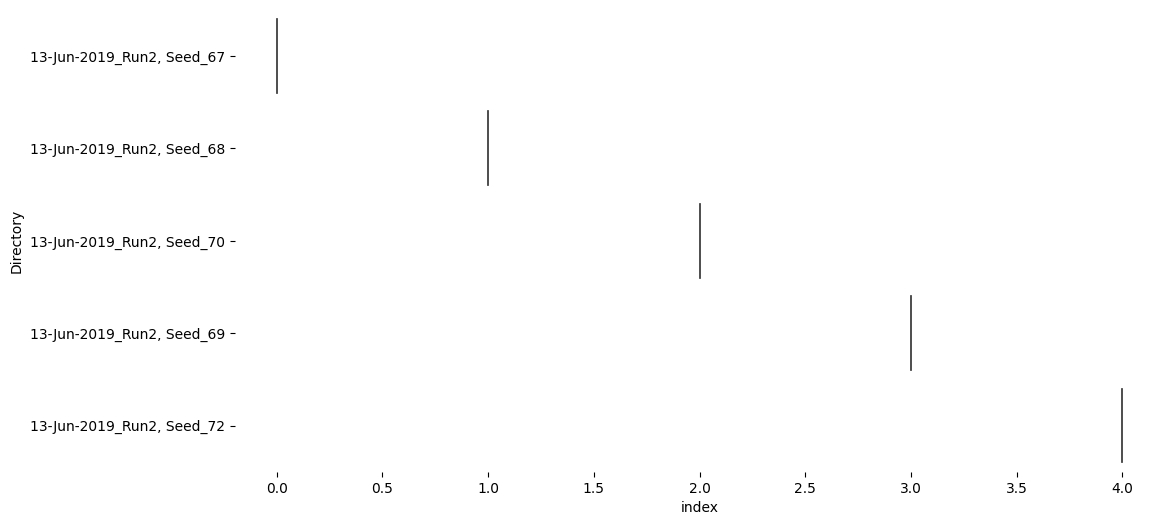

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Directory'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='Directory', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

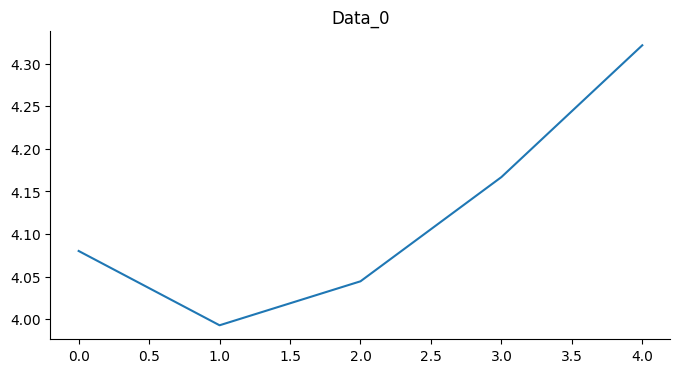

In [ ]:
from matplotlib import pyplot as plt
_df_14['Data_0'].plot(kind='line', figsize=(8, 4), title='Data_0')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_15['Data_1'].plot(kind='line', figsize=(8, 4), title='Data_1')
plt.gca().spines[['top', 'right']].set_visible(False)

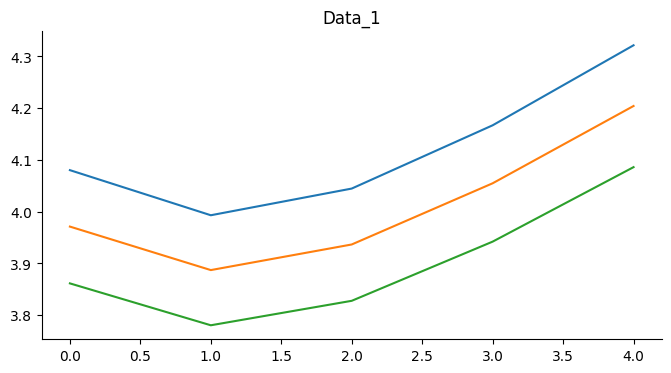

In [ ]:
from matplotlib import pyplot as plt
_df_14['Data_0'].plot(kind='line', figsize=(8, 4), title='Data_0')
_df_15['Data_1'].plot(kind='line', figsize=(8, 4), title='Data_1')
_df_15['Data_2'].plot(kind='line', figsize=(8, 4), title='Data_1')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
first_row_data = Z_data_df.iloc[0, 1]
first_row_data

0.0030341